# Прогноз необходимого числа набюдений эксперимента

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# TODO: Определить необходимое число наблюдений 
#       в эксперименте для получения значимого результата:
# Текущий уровень конверсии: 1%
# Минимальный уровень изменений: +0.1%
# Уровень значимости: 95%
# Требуемая мощность критерия: 90%

## Определим N для достижения необходимого уровня значимости

In [3]:
st.norm.ppf(0.95)

1.6448536269514722

In [4]:
# se1 = np.sqrt(p1 * (1 - p1) / n)
# se2 = np.sqrt(p2 * (1 - p2) / n)

# z = (p2 - p1) / np.sqrt(se1**2 + se2**2) -> st.norm.ppf(0.95) -> 1.645

# np.sqrt(se1**2 + se2**2) = (p2 - p1) / 1.645
# np.sqrt(se1**2 + se2**2) / ((p2 - p1) / 1.645) = np.sqrt(n)
# n = ( np.sqrt( p1 * (1 - p1) + p2 * (1 - p2) ) / ((p2 - p1) / 1.645) ) ** 2 

In [5]:
p1 = 0.01
p2 = 0.01 + 0.001
z = st.norm.ppf(0.95)
n = ( np.sqrt( p1 * (1 - p1) + p2 * (1 - p2) ) / ((p2 - p1) / z) ) ** 2 

In [6]:
n

56218.48743264866

## Проведем эксперимент и оценим долю ошибок I-го рода

In [7]:
M = 5000
sample1 = np.random.binomial(1, p1, size=(M, int(n)))

In [8]:
type_1_error_rate = np.sum(np.mean(sample1, axis=1) > p2) / M

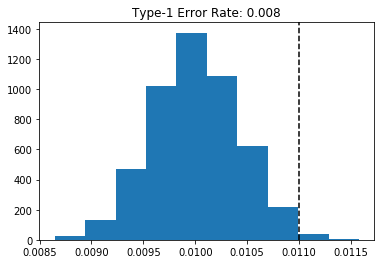

In [9]:
plt.hist(np.mean(sample1, axis=1))
plt.axvline(p2, color='k', linestyle='--')
plt.title('Type-1 Error Rate: %.3f' % type_1_error_rate);

## Определим число наблюдений для обеспечения необходимой мощности критерия

In [10]:
def calc_power(p1, p2, n, confidence=0.95):
    z = st.norm.ppf(confidence)
    s = np.sqrt(p1 * (1 - p1) / n + p2 * (1 - p2) / n)
    thr = z * s + p1
    betta = st.norm.cdf(thr, loc=p2, scale=s)
    return betta, s, thr

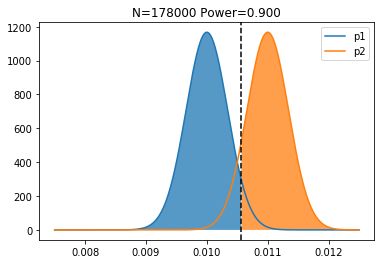

In [11]:
n = 178000  # например, подберем перебором
betta, s, thr = calc_power(0.01, 0.011, n)
power = 1 - betta

x = np.arange(0.0075, 0.0125, 0.00001)
plt.plot(x, st.norm.pdf(x, loc=p1, scale=s))
plt.plot(x, st.norm.pdf(x, loc=p2, scale=s))
plt.legend(['p1', 'p2'])
plt.axvline(thr, color='k', linestyle='--')
plt.fill_between(x, st.norm.pdf(x, loc=p1, scale=s), where=x<thr, alpha=0.75)
plt.fill_between(x, st.norm.pdf(x, loc=p2, scale=s), where=x>=thr, alpha=0.75)
plt.title('N=%d Power=%.3f' % (n, power));